# 1. Data wrangling

Objective of project: 
We want to predict 'Age of death' (lifespan) by using the features of 'Gender', 'Country', 'Occupation' and 'Birth year'. 

So, many text columns which need to be embedded. We'll go through the variables one by one.

Objective of script: 
- Get an overview of data and relevant predictors 
- Wrangle the predictors so that they are ready to be embedded or plotted directly into a model

## Questions to answer here:*
- where is the data from
- what does it contain
- look at code handbook from BRAINMINT 


In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # scikit-learn
import numpy as np
import wordcloud
#from sentence_transformers import SentenceTransformer
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression
from collections import Counter

### Overview of dataset and removing NAs from relevant columns

In [43]:
data = pd.read_csv('/work/datascience_exam/data/AgeDataset-V1.csv')

data.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


pandas.core.frame.DataFrame

In [5]:
data.shape

(1223009, 10)

Without removing NAs, we have 1.223.009 rows.

In [3]:
#overview of NAs
data.isna().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

But we have a lot of NAs. We'll start by removing NAs from the relevant columns. 

In [44]:
data = data.dropna(subset = ['Short description', 'Gender', 'Country', 'Occupation', 'Birth year', 'Age of death'])

In [5]:
data.isna().sum()

Id                        0
Name                      0
Short description         0
Gender                    0
Country                   0
Occupation                0
Birth year                0
Death year                0
Manner of death      687133
Age of death              0
dtype: int64

In [5]:
data= data.filter(items = ['Short description', 'Gender', 'Country', 'Occupation', 'Birth year', 'Age of death'])

In [7]:
data.head()

,Short description,Gender,Country,Occupation,Birth year,Age of death
0,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,67.0
1,English writer and humorist,Male,United Kingdom,Artist,1952,49.0
2,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,56.0
3,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,35.0
4,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,57.0


In [8]:
data.shape

(732961, 6)

Now we're down to 735.785 rows. 

## Inspecting and potentially recoding variables
No data will transfer from columns because I'm not standardizing, I'm recoding the values of columns to make them easier to work with.

### 'Birth year' variable

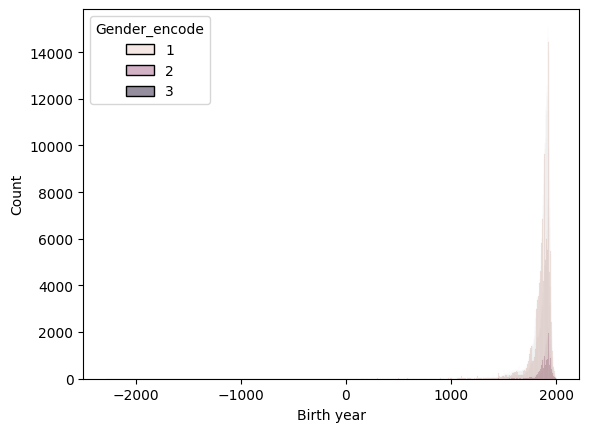

In [69]:
sns.histplot(data = data, x = 'Birth year', hue = 'Gender_encode')
#plt.legend(title = "Gender", loc = "upper left", labels = ["Other", "Female", "Male"])
plt.show()

In [ ]:
# make plot with linear regression which shows lifespan over time?? 

### 'Gender' variable

In [47]:
data["Gender"].value_counts()

Gender
Male                                              659548
Female                                             73286
Transgender Female                                    57
Transgender Male                                      30
Eunuch; Male                                          13
Intersex                                               7
Female; Male                                           5
Transgender Male; Female                               3
Non-Binary                                             2
Transgender Person; Intersex; Transgender Male         1
Intersex; Male                                         1
Transgender Female; Male                               1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Male; Male                                 1
Eunuch                                                 1
Transgender Female; Intersex                           1
Female; Female          

Most rows are either 'Male' or 'Female', while a small handfull of rows are more gender-fluid (except for one column being labelled 'Female; Female'). To make modelling easier, we'll encode a new gender column, where 1 = 'Male, 2 = 'Female' and 3 = 'Other'.

In [63]:
def map_gender(value):
    #if value in ['Male', 'Eunuch', 'Eunuch; Male']:
    if value == 'Male':
        return 1
    elif value in ['Female', 'Female; Female']:
        return 2
    else:
        return 3

In [64]:
# Apply the function to the 'gender_column' and store the results in a new column 'gender_encode'
data.loc[:,'Gender_encode'] = data['Gender'].apply(map_gender)

In [8]:
data["Gender_encode"].value_counts()

Gender_encode
1    659548
2     73287
3       126
Name: count, dtype: int64

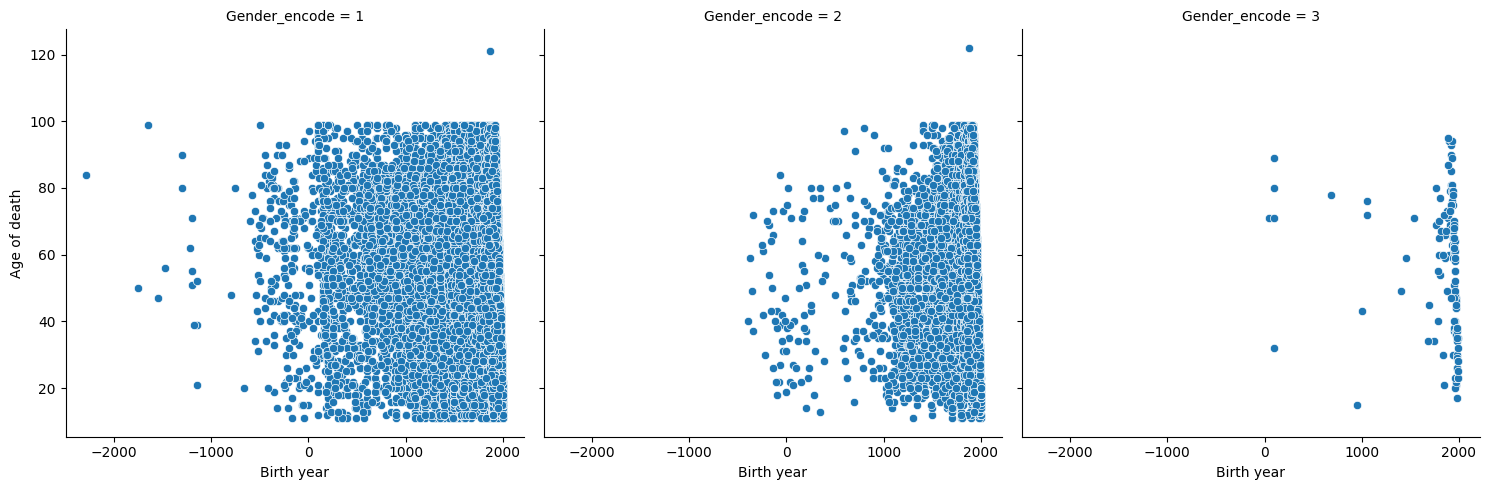

In [9]:
# Plotting encoded gender column
sns.relplot(
    data=data,
    x="Birth year", y="Age of death", 
    col="Gender_encode"#,
   #hue="smoker", style="smoker", size="size",
)
plt.gcf()
plt.show()

In [ ]:
# save fig - change gender_encode title first (male, female, other)
#plt.savefig('/work/datascience_exam/output/plots/gender_overview.jpg')

Male dominated dataset

In [14]:
data.head()

,Short description,Gender,Country,Occupation,Birth year,Age of death,Gender_encode
0,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,67.0,1
1,English writer and humorist,Male,United Kingdom,Artist,1952,49.0,1
2,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,56.0,1
3,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,35.0,1
4,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,57.0,1


/tmp/ipykernel_355/3417922205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_encode', y='Age of death', data=data, palette='viridis')


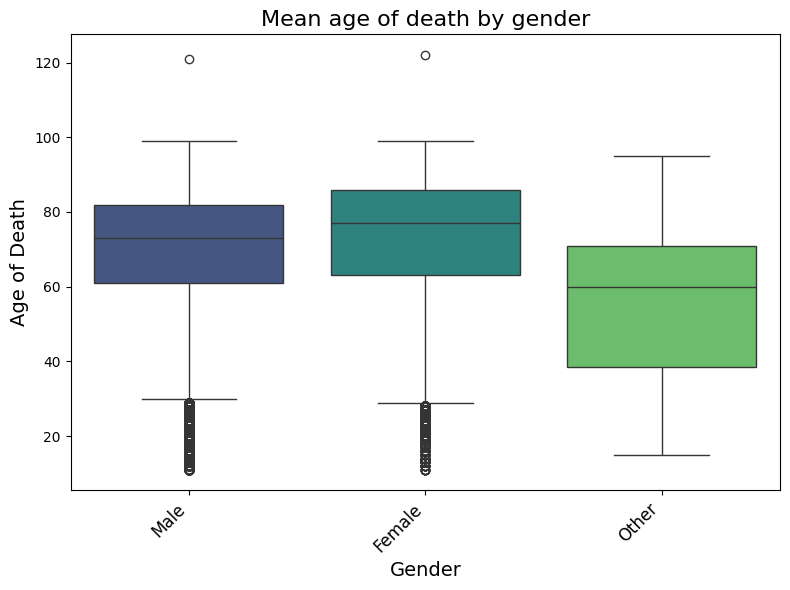

In [17]:
#### boxplot of mean age of death in gender

#The 'whiskers' are quartiles of the data and the points are outliers (determined by the boxplot function)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_encode', y='Age of death', data=data, palette='viridis')

# Adding titles and labels
plt.title('Mean age of death by gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age of Death', fontsize=14)
plt.xticks([0, 1,2], ['Male', 'Female', 'Other'], rotation = 45, ha = 'right', fontsize = 12)

# Display the plot
plt.tight_layout()
fig = plt.gcf() # get current figure
plt.show()

In [73]:
# save fig
fig.savefig('/work/datascience_exam/output/plots/mean_age_gender.jpg')

### 'Country' variable
This column contains many different labels, because countries have changed their names throughout time and because some people might belong to different countries. So, we want to embed this column. 

- consider only including countries with a certain number of famous people?? 

In [10]:
data["Country"].value_counts()

Country
United States of America                                       145078
Germany                                                         78694
France                                                          64165
United Kingdom; United Kingdom of Great Britain and Ireland     28257
United Kingdom                                                  21270
                                                                ...  
Ottoman Empire; United States of the Ionian Islands                 1
United States of America; Prince-Bishopric of Münster               1
Nizari Ismaili state                                                1
Hungary; Kingdom of Italy                                           1
Dominion of New Zealand                                             1
Name: count, Length: 5505, dtype: int64

5,522 unique rows.
I have eyeballed some labels, which could be combined. They are merged in the next code chunk:

In [11]:
len(data["Country"]) # 735,785

732961

In [12]:
len(data['Country'].unique())

5505

5,522 unique rows. We want to embed this column using a pretrained language model. More on that later.

#### Preprocessing for NLP - transform letters to lowercase (minuscule)
- Make function, because we are going to need it later

In [51]:
def lowercase(data, column_name):
    column_list = data[column_name].tolist()

    column_list_lower = []
    for idx in range(0,len(column_list)):
        temp = column_list[idx].lower()
        column_list_lower += [temp]
    
    data.loc[:,column_name] = column_list_lower
    
    return(data, column_list_lower)

In [52]:
# applying function
data, country_list = lowercase(data, 'Country')

#### make wordcloud

In [32]:
word_list_country = [word.strip() for sublist in data['Country'].str.split(';') for word in sublist]
len(word_list_country) # we know have 100,000 more rows, because some rows/persons have two countries listed 
count_country = Counter(word_list_country)
#len(count_country)
#count_country.most_common(50)
# consider cleaning - adding some columns together 
#sorted(count_country.items())

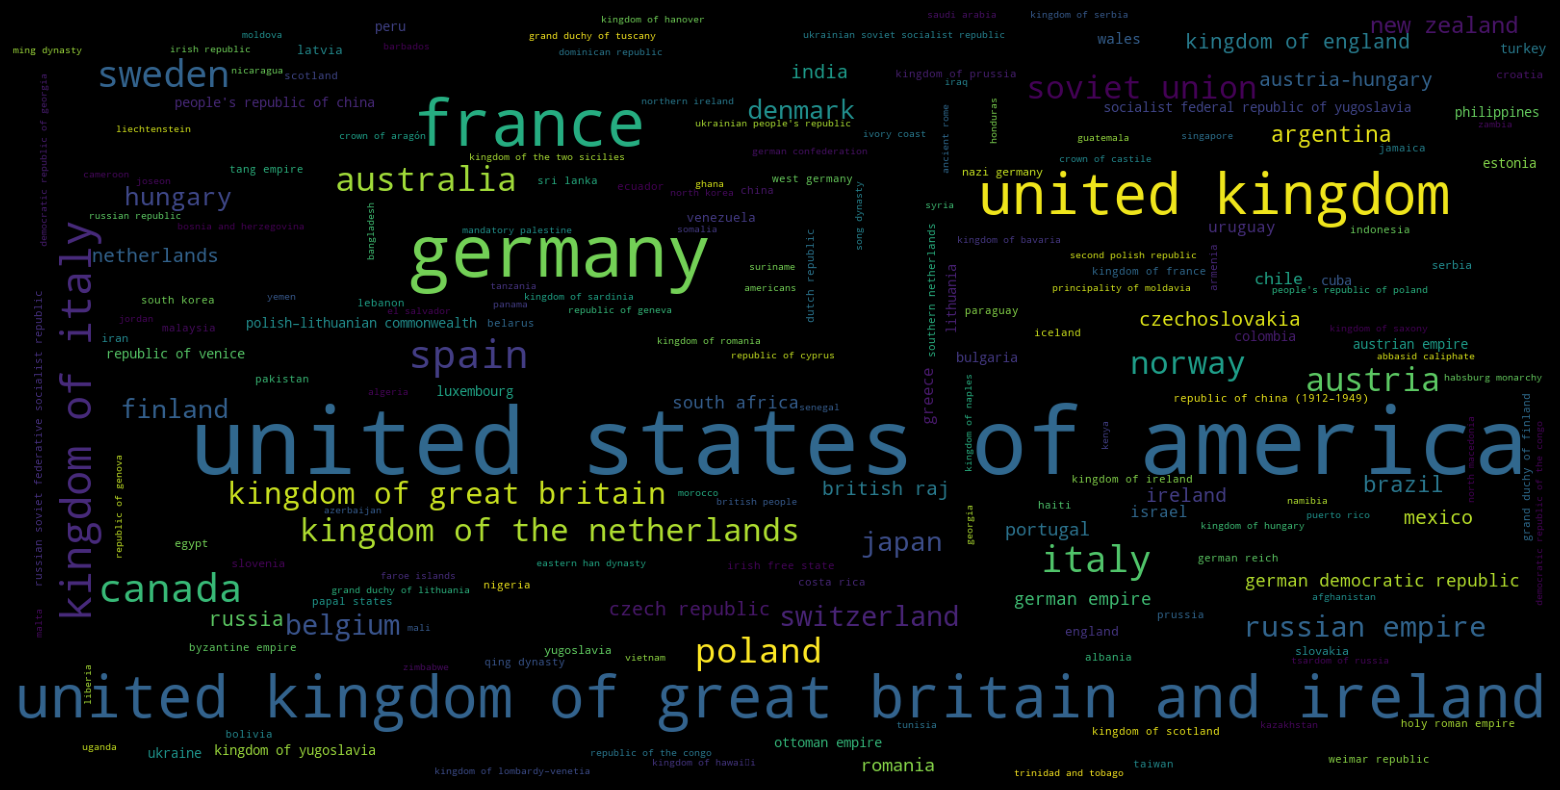

In [17]:
wordcloud_country2 = wordcloud.WordCloud(width=1600, height=800).generate_from_frequencies(count_country)
#plt.tight_layout(pad = 0)

plt.figure( figsize=(20,10), facecolor = 'k')
plt.imshow(wordcloud_country2)#, interpolation='bilinear')
plt.axis("off")
plt.gcf()
plt.show()

In [ ]:
# save fig
#plt.savefig('/work/datascience_exam/output/plots/wordcloud_country.jpg')
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [22]:
# manually fixing some countries, which are the same
# concatenate some columns
data["Country"] = data["Country"].str.replace('united kingdom; united kingdom of great britain and ireland','united kingdom of great britain and ireland')
# maybe not!

#### Mean age of death in different countries
Make boxplot of mean age of death in most common countries. 

In [23]:
# make plot with mean age of death in 20 most common countries
country_list = data['Country'].to_list()
count = Counter(country_list)
count.most_common(20)

[('united states of america', 145078),
 ('germany', 78694),
 ('france', 64165),
 ('united kingdom of great britain and ireland', 45558),
 ('united kingdom', 21270),
 ('canada', 20985),
 ('spain', 20496),
 ('sweden', 18580),
 ('italy; kingdom of italy', 15217),
 ('poland', 14089),
 ('norway', 13526),
 ('australia', 13454),
 ('kingdom of the netherlands', 13444),
 ('austria', 12552),
 ('belgium', 9814),
 ('switzerland', 9317),
 ('japan', 9314),
 ('kingdom of italy', 8619),
 ('finland', 8353),
 ('denmark', 8293)]

In [25]:
selected_countries = ['united states of america,' 'germany', 'france', 'united kingdom', 'united kingdom of great britain and ireland', 'canada', 'spain', 
                    'sweden', 'italy', 'italy: kingdom of italy', 'poland', 'norway', 'kingdom of the netherlands', 'australia', 'austria', 'belgium',
                    'japan', 'switzerland', 'kingdom of italy', 'denmark', 'finland']

In [26]:
filtered_data = data[data['Country'].isin(selected_countries)]

/tmp/ipykernel_5112/1576162892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Age of death', data=filtered_data, palette='viridis')


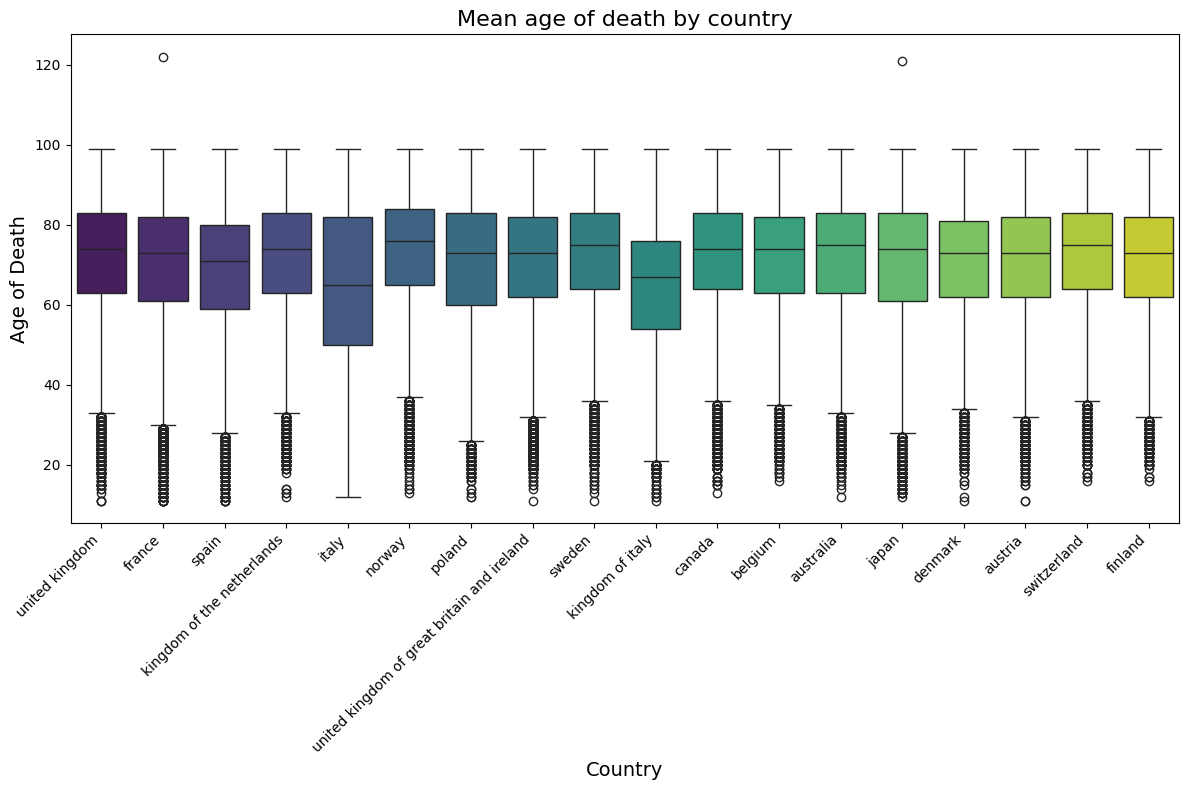

In [27]:
# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Age of death', data=filtered_data, palette='viridis')

# Adding titles and labels
plt.title('Mean age of death by country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Age of Death', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
fig = plt.gcf() # get current figure
plt.show()

In [ ]:
# save figure
fig.savefig('/work/datascience_exam/output/plots/mean_age_country.jpg')

### 'Occupation' variable
"Occupation" also spans wide with 7,820 unique rows. We want to embed that column, too. But first, we want to know how many rows have more than one string. 

In [28]:
data["Occupation"].value_counts()
#data["Occupation"].unique().tolist()

Occupation
Artist                                    207322
Politician                                152916
Athlete                                    92645
Researcher                                 63799
Military personnel                         36025
                                           ...  
Feminism                                       1
Pedagogue; violinist; music pedagogue          1
Muezzin; terrorist                             1
Médaille de la résistance                      1
Clarinet; clarinetist; music pedagogue         1
Name: count, Length: 7750, dtype: int64

In [31]:
len(data['Occupation'].unique())

7750

In [29]:
# applying function
data, occupation_list = lowercase(data, 'Occupation')

#### Wordcloud

In [ ]:
word_list_occupation = [word.strip() for sublist in data['Occupation'].str.split(';') for word in sublist]
count_occupation = Counter(word_list_occupation)
count_occupation.most_common(20)

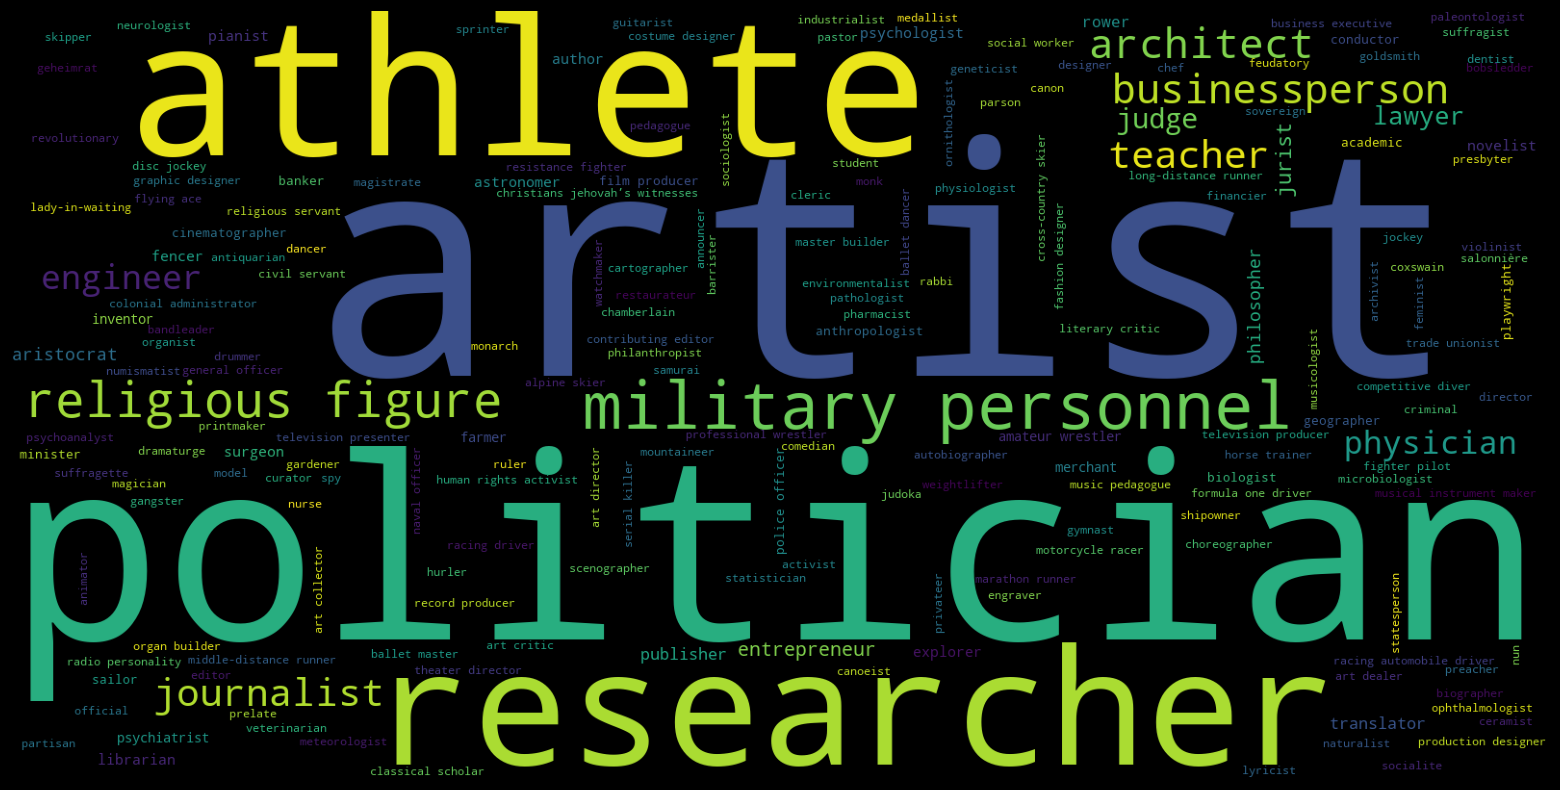

In [33]:
wordcloud_occupation = wordcloud.WordCloud(width=1600, height=800).generate_from_frequencies(count_occupation)

#plt.tight_layout(pad = 0)
plt.figure( figsize=(20,10), facecolor = 'k')
plt.imshow(wordcloud_occupation)#, interpolation='bilinear')
plt.axis("off")
plt.gcf()
plt.show()

In [ ]:
# save figure

#### Mean age of death in different occupations
Make boxplot of mean age of death in most common occupations

In [34]:
count = Counter(occupation_list)
count.most_common(20)

[('artist', 207322),
 ('politician', 152916),
 ('athlete', 92645),
 ('researcher', 63799),
 ('military personnel', 36025),
 ('religious figure', 18538),
 ('architect', 12588),
 ('businessperson', 12108),
 ('journalist', 10929),
 ('teacher', 10769),
 ('engineer', 8257),
 ('physician', 7538),
 ('judge', 5702),
 ('lawyer', 4453),
 ('jurist', 2796),
 ('entrepreneur', 2501),
 ('aristocrat', 2040),
 ('translator', 1747),
 ('publisher', 1711),
 ('philosopher', 1691)]

In [35]:
selected_occupations1 = ['artist', 'politician', 'athlete', 'researcher', 'military personnel', 'religious figure', 'architect', 
                        'businessperson', 'journalist', 'teacher', 'engineer', 'physician', 'judge', 'lawyer', 'jurist', 'entrepreneur', 
                        'aristocrat', 'translator', 'publisher', 'philosopher', 'rover', 'librarian', 'astronomer', 'fencer', 'psychologist', 'novelist', 'surgeon', 'pianist', 'merchant', 'author', 
                        'amateur wrestler', 'farmer', 'explorer', 'inventor', 'minister', 'sailor', 'film producer', 'psychiatrist','cinematographer', 'police officer']

In [36]:
selected_occupations2 = ['flying ace', 
                         'anthropologist', 'banker', 'academic', 'geographer', 'rabbi', 'biologist', 'civil servant', 'trade unionist','playwright', 'nun', 'organist', 'samurai', 'sprinter', 'designer', 
                        'naval officer','graphic designer','archivist', 'conductor', 'canoeist', 'pharmacist', 'organ builder', 'radio personality', 'activist', 'presbyter', 'sovereign', 'official',
                        'pastor', 'partisan', 'theater director', 'monarch','revolutionary', 'motorcycle racer', 'veterinarian', 'alpine skier', 'jockey', 'guitarist', 'ruler', 'magistrate', 'monk']

In [37]:
selected_occupations3 = ['business executive', 'ballet dancer', 'nurse', 'cross-country skier', 'television presenter', 'professional wrestler', 'lady-in-waiting', 
                        'prelate', 'dentist', 'art collector', 'bobsledder', 'scenographer', 'weightlifter', 'serial killer', 'curator', 'skipper', 'ornithologist', 
                        'sociologist', 'racing automobile driver', 'mountaineer', 'drummer', 'socialite', 'philanthropist', 'engraver', 'christians jehovah’s witnesses', 
                        'meteorologist', 'hurler', 'parson', 'general officer', 'horse trainer', 'medallist', 'editor', 'spy', 'art dealer', 'marathon runner', 'numismatist', 
                        'preacher', 'racing driver', 'lyricist', 'cleric']

In [38]:
filtered_data = data[data['Occupation'].isin(selected_occupations3)] #CHANGE HERE

In [39]:
mean_age_of_death = filtered_data.groupby('Occupation')['Age of death'].mean().reset_index()

In [40]:
# Define the specific list of row strings in the desired order
specific_order = selected_occupations3 # CHANGE HERE

# Create a dictionary to store the index of each name in the specific order
name_index = {name: i for i, name in enumerate(specific_order)}

# Create a function to get the index from the specific order for each name
def get_index(name):
    return name_index.get(name, float('inf'))

# Create a new column with the order based on the specific list
filtered_data.loc[:,'Order'] = filtered_data['Occupation'].apply(get_index)

# Sort the DataFrame based on the new 'Order' column and original index to maintain the original order of rows with the same name
data_sorted = filtered_data.sort_values(by=['Order'])#, filtered_data.index])

# Drop the 'Order' column if it's no longer needed
#data_sorted = data_sorted.drop(columns=['Order'])
data_sorted.head()

/tmp/ipykernel_5112/1062238439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,'Order'] = filtered_data['Occupation'].apply(get_index)


,Short description,Gender,Country,Occupation,Birth year,Age of death,Gender_encode,Order
880035,shipping executive,Male,united kingdom,business executive,1925,75.0,1,0
843599,company director,Male,united kingdom of great britain and ireland,business executive,1848,74.0,1,0
487577,schwedischer Unternehmensleiter,Male,sweden,business executive,1838,88.0,1,0
487633,schwedischer Geschäftsmann,Male,sweden,business executive,1844,72.0,1,0
1086272,schwedischer Unternehmensleiter,Male,sweden,business executive,1878,81.0,1,0


/tmp/ipykernel_5112/2051147240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Age of death', data=data_sorted, palette='viridis')


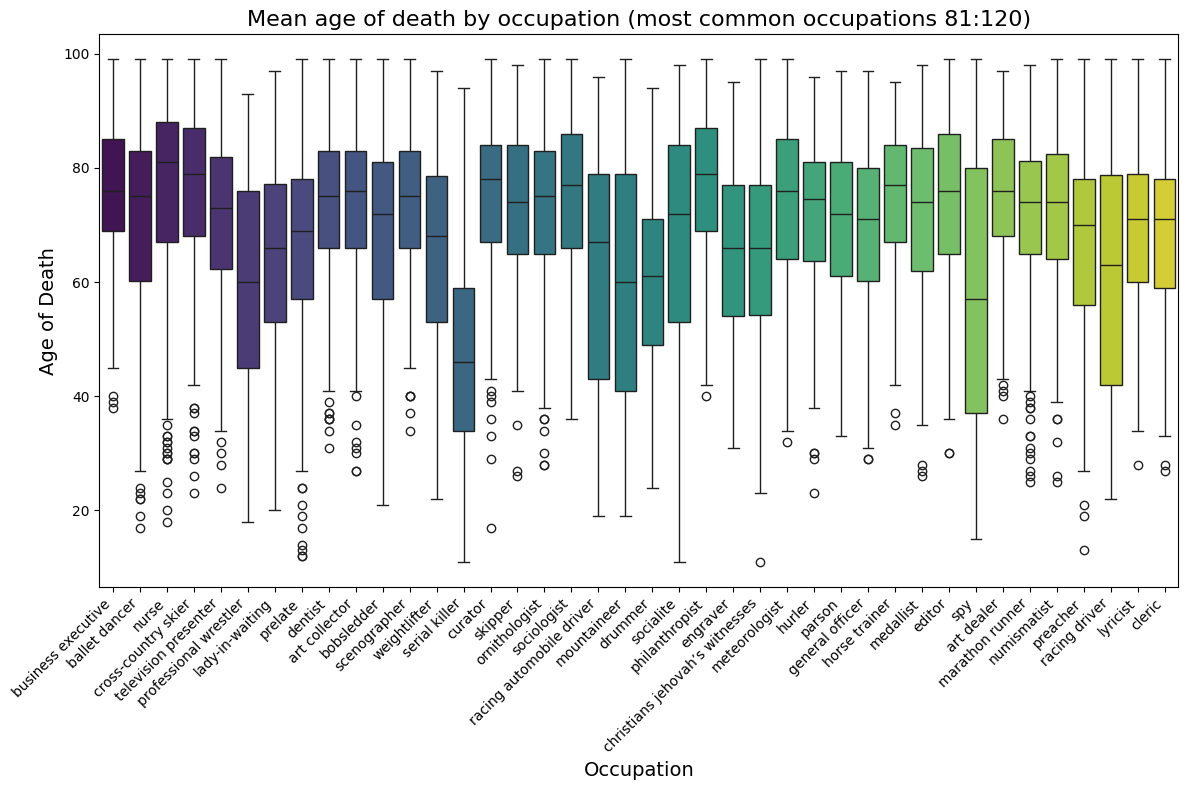

In [41]:
# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Age of death', data=data_sorted, palette='viridis')

#ax = sns.boxplot(x='Occupation', y='Age of death', data=filtered_data, palette='viridis')


# Adding the mean values on top of each boxplot
#for i in range(len(mean_age_of_death)):
 #   occupation = mean_age_of_death['Occupation'][i]
  #  mean_age = mean_age_of_death['Age of death'][i]
  #  x = selected_occupations.index(occupation)
  #  y = mean_age
  #  ax.text(x, y + 0.5, f'{mean_age:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding titles and labels
plt.title('Mean age of death by occupation (most common occupations 81:120)', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Age of Death', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
fig = plt.gcf() # get current figure
plt.show()

In [ ]:
#fig.savefig('/work/datascience_exam/output/plots/mean_age_occupation1.jpg')
fig.savefig('../output/plots/mean_age_occupation3.jpg') # CHANGE HERE

In [67]:
# Count the number of strings in each cell
string_counts = data['Occupation'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

# Filter columns where the count is greater than 1
rows_with_multiple_strings = string_counts[string_counts > 1]

# Count the number of such columns
num_rows_with_multiple_strings = len(rows_with_multiple_strings)

print("Number of rows containing more than one string:", num_rows_with_multiple_strings)

Number of rows containing more than one string: 11881


In [ ]:
#rows_with_multiple_strings.index
filtered_data = data.loc[rows_with_multiple_strings.index]

filtered_data['Occupation'].value_counts()

len(filtered_data['Occupation'].unique())

filtered_data['Occupation'].to_list()

# Filter out rows with more than one string

data = data[~data.index.isin(rows_with_multiple_strings.index)]
len(data["Occupation"].unique())
# down to less than 2k

### 'Short description' variable 

### 'Manner of death' variable

In [45]:
manner_of_death = data.dropna(subset = ["Manner of death"])
manner_of_death.head()

(45828, 10)

In [49]:
manner_of_death, manner_of_death_list = lowercase(manner_of_death, 'Manner of death')

/tmp/ipykernel_5112/1162244617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = column_list_lower


In [55]:
count = Counter(manner_of_death_list)
count.most_common(20)

[('natural causes', 31045),
 ('suicide', 4508),
 ('accident', 4373),
 ('homicide', 3273),
 ('capital punishment', 1770),
 ('unnatural death', 282),
 ('death in battle', 142),
 ('capital punishment; unnatural death', 62),
 ('capital punishment; homicide', 31),
 ('accident; natural causes', 29),
 ('capital punishment; suicide', 26),
 ('suicide; accident', 22),
 ('suicide; homicide', 10),
 ('homicide; homicide', 9),
 ('shipwrecking', 7),
 ('extrajudicial killing', 6),
 ('euthanasia', 6),
 ('suicide; natural causes', 6),
 ('eastern front of world war ii', 6),
 ('war', 6)]

In [56]:
# how to get the keys to easily copy
counter_dict = dict(count)

sorted_items = sorted(counter_dict.items(), key=lambda x: x[1], reverse=True)
keys_in_range = [item[0] for item in sorted_items[0:20]]
print(keys_in_range)

['natural causes', 'suicide', 'accident', 'homicide', 'capital punishment', 'unnatural death', 'death in battle', 'capital punishment; unnatural death', 'capital punishment; homicide', 'accident; natural causes', 'capital punishment; suicide', 'suicide; accident', 'suicide; homicide', 'homicide; homicide', 'shipwrecking', 'extrajudicial killing', 'euthanasia', 'suicide; natural causes', 'eastern front of world war ii', 'war']


In [57]:
selected_deaths = ['natural causes', 'homicide', 'accident', 'suicude','capital punishment', 'unnatural death', 'death in battle', 'capital punishment; unnatural death',
                    'capital punishment; homicide', 'accident; natural causes', 'capital punishment; suicide', 'suicide; accident', 'suicide; homicide', 'homicide; homicide', 'shipwrecking', 
                    'extrajudicial killing', 'euthanasia', 'suicide; natural causes', 'eastern front of world war ii', 'war']

In [58]:
filtered_data = manner_of_death[manner_of_death['Manner of death'].isin(selected_deaths)]

/tmp/ipykernel_5112/3238691975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Manner of death', y='Age of death', data=filtered_data, palette='viridis')


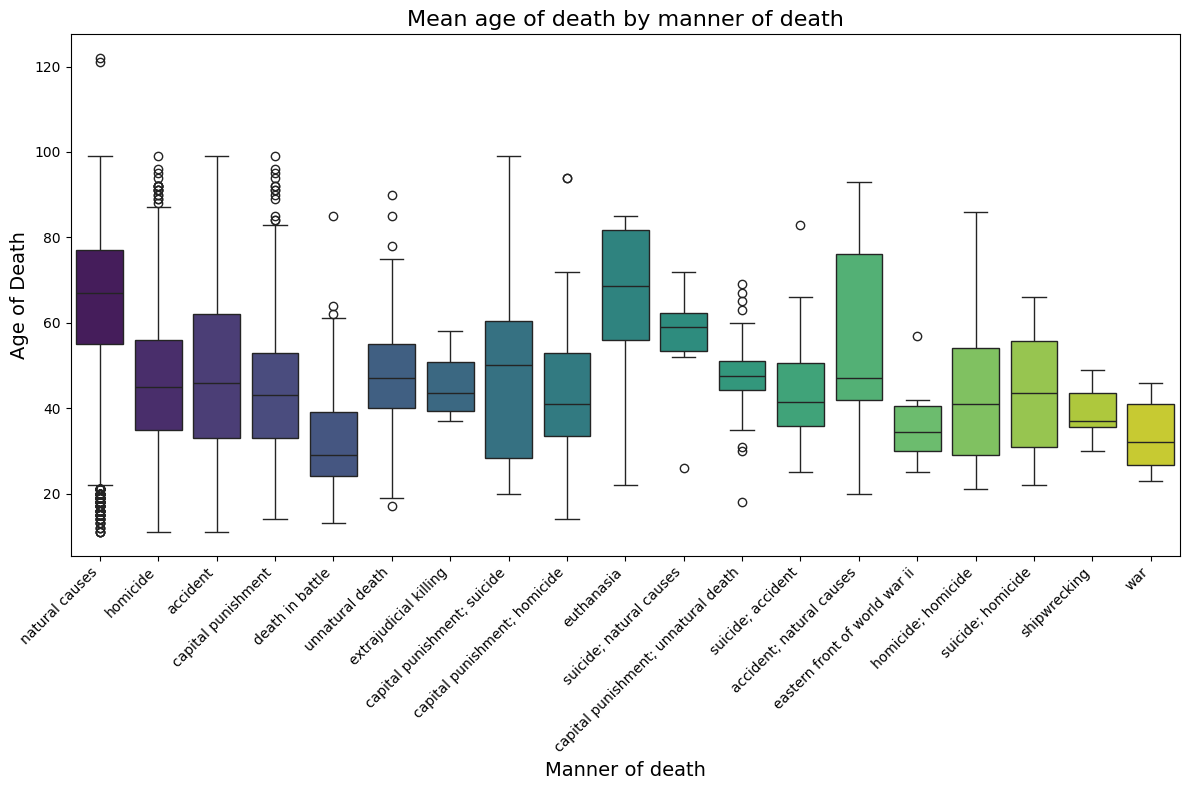

In [59]:
# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manner of death', y='Age of death', data=filtered_data, palette='viridis')

# Adding titles and labels
plt.title('Mean age of death by manner of death', fontsize=16)
plt.xlabel('Manner of death', fontsize=14)
plt.ylabel('Age of Death', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
fig = plt.gcf() # get current figure
plt.show()

In [ ]:
# save figure
fig.savefig('/work/datascience_exam/output/plots/mean_age_manner_of_death.jpg')

# CODE FIXED ABOVE - BELOW NEEDS TO BE FIXED

### Age of death
The outcome variable, which we seek to predict.

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/2710900680.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Male", "Female", "Other"])


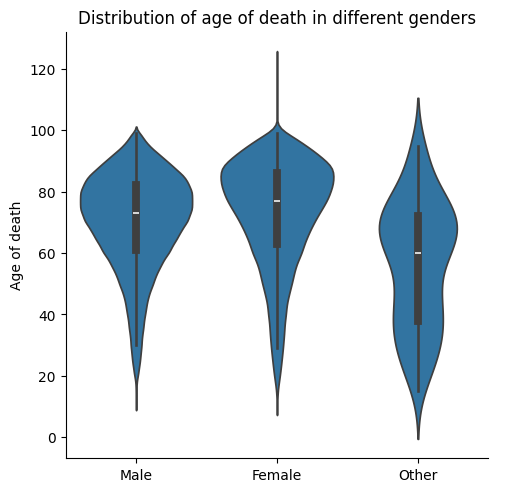

In [45]:
#sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
sns.catplot(data=data, kind = 'violin', x = 'Gender_encode', y = 'Age of death')#, hue = "Gender_encode")#, split = True)

plt.gca().set_xticklabels(["Male", "Female", "Other"])
plt.gca().set_title('Distribution of age of death in different genders')
plt.gca().set_xlabel('')

plt.show()

In [46]:
# For fun
data_ar_pol = data[data['Occupation'].isin(["politician", "artist"])]
#data_ar_pol = data_ar_pol[data_ar_pol['Gender_encode'].isin([1, 2])]
data_ar_pol.head()
data_ar_pol['Occupation'].value_counts()
data_ar_pol['Gender_encode'].value_counts()

Gender_encode
1    315502
2     45230
3        69
Name: count, dtype: int64

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/472536192.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Male", "Female", "Other"])


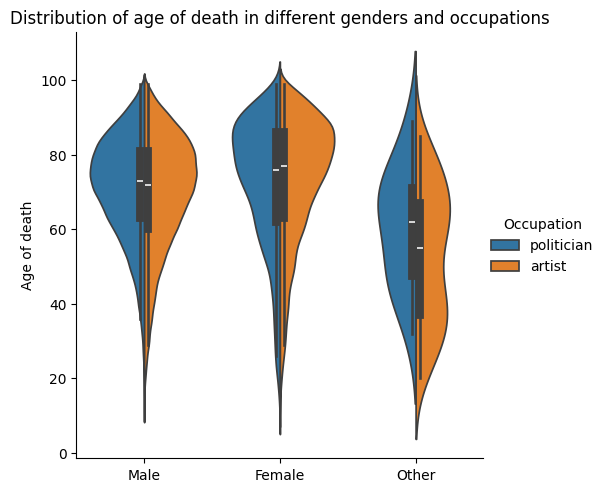

In [47]:
#sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
sns.catplot(data=data_ar_pol, kind = 'violin', x = "Gender_encode", y = 'Age of death', hue = "Occupation", split = True)

plt.gca().set_xticklabels(["Male", "Female", "Other"])
plt.gca().set_title('Distribution of age of death in different genders and occupations')
plt.gca().set_xlabel('')

plt.show()

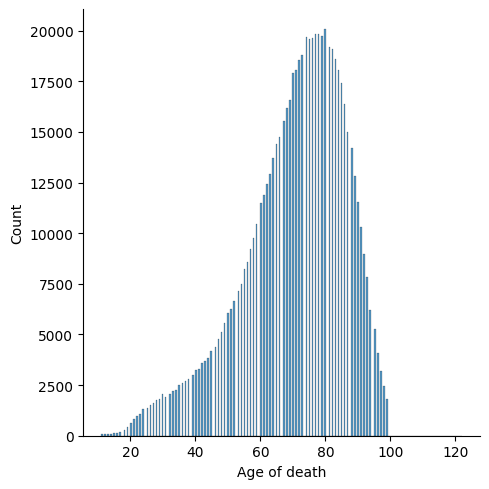

In [48]:
#sns.displot(data=tips, x="total_bill", col="time", kde=True)
sns.displot(data = data, x= 'Age of death', kind = 'hist')

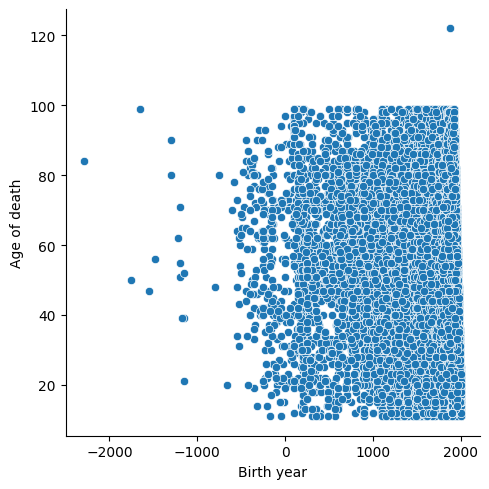

In [49]:
# Age of death compared to when you were born

sns.relplot(
    data=data,
    x="Birth year", y="Age of death" 
   #col="Gender_encode"#,
   #hue="smoker", style="smoker", size="size",
)


In [233]:
data['Birth year'].min()

-2284

In [69]:
bins=range(-2284, 2024, 250)

In [70]:
data['Birth_year_group'] = pd.cut(data['Birth year'], bins = bins, right=False)


In [64]:
data.head()

,Gender,Country,Occupation,Birth year,Age of death,Gender_encode,Birth_year_group
0,Male,United States of America; Kingdom of Great Bri...,politician,1732,67.0,1,"[1716, 1966)"
1,Male,United Kingdom,artist,1952,49.0,1,"[1716, 1966)"
2,Male,United States of America,politician,1809,56.0,1,"[1716, 1966)"
3,Male,Archduchy of Austria; Archbishopric of Salzburg,artist,1756,35.0,1,"[1716, 1966)"
4,Male,Holy Roman Empire; Austrian Empire,artist,1770,57.0,1,"[1716, 1966)"


In [65]:
mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/430851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


In [66]:
mean_age_of_death

,Birth_year_group,Age of death
0,"[-2284, -2034)",84.000000
1,"[-2034, -1784)",NaN
2,"[-1784, -1534)",65.333333
3,"[-1534, -1284)",75.333333
4,"[-1284, -1034)",48.750000
5,"[-1034, -784)",48.000000
6,"[-784, -534)",58.375000
7,"[-534, -284)",62.117647
8,"[-284, -34)",51.978571
9,"[-34, 216)",56.228228


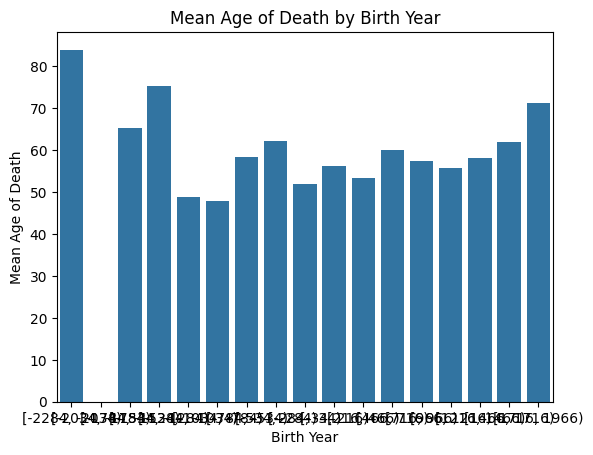

In [67]:
sns.barplot(data=mean_age_of_death, x='Birth_year_group', y='Age of death')

# Add labels and title
plt.xlabel('Birth Year')
plt.ylabel('Mean Age of Death')
plt.title('Mean Age of Death by Birth Year')

plt.show()

In [71]:


# Bin 'Birth_Year' into groups of every 10 years
#bins = range(-2284, 2000, 20)
data['Birth_year_group'] = pd.cut(data['Birth year'], bins=bins, right=False)

bin_midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

mean_age_of_death['bin_mid'] = bin_midpoints
# Calculate the mean age of death for each birth year group
mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/1077292008.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


In [72]:
mean_age_of_death['bin_mid'] = bin_midpoints
mean_age_of_death['bin_mid'] = mean_age_of_death['bin_mid'].astype(int)
mean_age_of_death.head()

,Birth_year_group,Age of death,bin_mid
0,"[-2284, -2034)",84.000000,-2159
1,"[-2034, -1784)",NaN,-1909
2,"[-1784, -1534)",65.333333,-1659
3,"[-1534, -1284)",75.333333,-1409
4,"[-1284, -1034)",48.750000,-1159


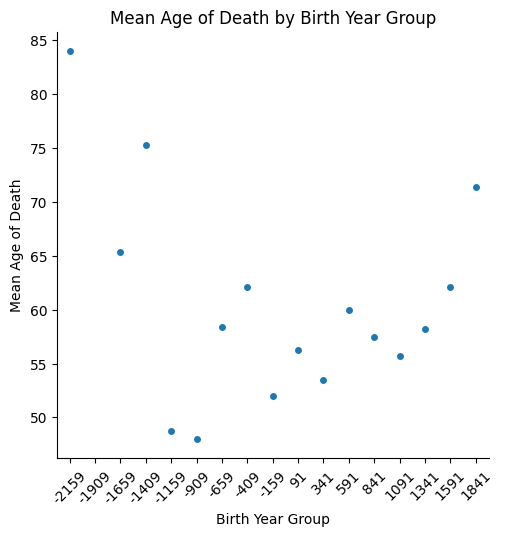

In [75]:
sns.catplot(data = mean_age_of_death, x='bin_mid', y='Age of death')#, marker='o', color='blue')

plt.xlabel('Birth Year Group')
plt.ylabel('Mean Age of Death')
plt.title('Mean Age of Death by Birth Year Group')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_xticks(plt.gca().get_xticks()[::])  # Show every 10th tick # [::10]

plt.show()

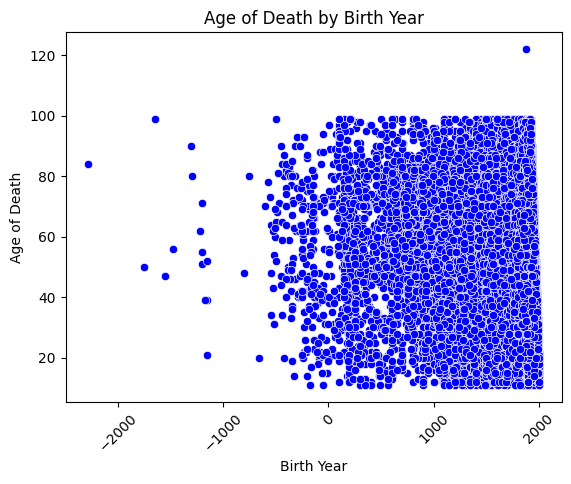

In [78]:
sns.scatterplot(x='Birth year', y='Age of death', data=data, marker='o', color='blue')

# Add labels and title
plt.xlabel('Birth Year')
plt.ylabel('Age of Death')
plt.title('Age of Death by Birth Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

### Joint plots

In [ ]:
#sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
sns.jointplot(data=data, x="Birth year", y="Age of death", hue="Gender_encode")

In [ ]:
sns.pairplot(data=data, hue="Gender_encode")

# splitting data into training, validation and test 

In [81]:
# rearranging the order of columns
data = data[["Gender_encode", "Country", "Occupation", "Birth year", "Age of death"]]

In [82]:
data.head()

,Gender_encode,Country,Occupation,Birth year,Age of death
0,1,United States of America; Kingdom of Great Bri...,politician,1732,67.0
1,1,United Kingdom,artist,1952,49.0
2,1,United States of America,politician,1809,56.0
3,1,Archduchy of Austria; Archbishopric of Salzburg,artist,1756,35.0
4,1,Holy Roman Empire; Austrian Empire,artist,1770,57.0


In [83]:
X = data.iloc[:,:4].values # all rows, column 1 to (not incl) 4
y = data.iloc[:,4].values # all rows, column 4

In [84]:
# split data into train and test using scikitlearn
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)


# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [85]:
# save data
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = data.columns
    df.to_csv(f'data/{name}.csv')

# General plots of data

# seaborn something... correlation plots?? 